<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9E%D0%B1%D0%BD%D0%B0%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D1%80%D0%B0%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обнаружение краев

# Edge detection


В этом уроке мы научимся находить края объектов на изображении

In this lesson we will learn how to find the edges of objects in an image


> **Обнаружение краев** - это процесс поиска краев на изображении, который раскрывает структурную информацию об объектах



> **Edge detection** is the process of finding edges in an image, which reveals structural information about objects

Поговорим чуть подробнее об функции **Canny()**

**Алгоритм обнаружения краев Canny можно разбить на 5 шагов:**

Let's talk a little more about the **Canny()** function

**The Canny's edge detection algorithm can be broken down into 5 steps:**

Шаг 1: Сглаживание изображения с помощью фильтра Гаусса для удаления высокочастотного шума. Step 1: Smoothing the image using a Gaussian filter to remove high frequency noise.

Шаг 2: Вычисление представления интенсивности градиента изображения. Step 2: Calculating the image gradient intensity representation.

Шаг 3: Применение не максимального подавления для удаления "ложных" ответов на обнаружение краев.  Step 3: Applying no maximum suppression to remove "false" edge detection responses.

Шаг 4: Применение пороговуй обработиу, используя нижнюю и верхнюю границы для значений градиента. Step 4: Apply thresholding using lower and upper bounds for gradient values.

Шаг 5: Отслеживание краев путем подавления слабых краев, не связанных с сильными краями. Step 5: Trace edges by suppressing weak edges not related to strong edges.














In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_23.Edge_detection.zip
!unzip Lesson_23.Edge_detection.zip
%cd /content/Lesson_23.Edge_detection

--2022-02-01 18:53:15--  http://dataudt.ru/datasets/cv/Lesson_23.Edge_detection.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1799565 (1.7M) [application/zip]
Saving to: ‘Lesson_23.Edge_detection.zip’

Lesson_23.Edge_dete 100%[===================>]   1.72M  2.53MB/s    in 0.7s    

2022-02-01 18:53:17 (2.53 MB/s) - ‘Lesson_23.Edge_detection.zip’ saved [1799565/1799565]

Archive:  Lesson_23.Edge_detection.zip
  inflating: Lesson_23.Edge_detection/coins_01.png  
  inflating: Lesson_23.Edge_detection/coins_03.png  
  inflating: Lesson_23.Edge_detection/Edge_detection.py  
  inflating: Lesson_23.Edge_detection/pill_02.png  
  inflating: Lesson_23.Edge_detection/pill_04.png  
/content/Lesson_23.Edge_detection


In [2]:
# импортируем необходимые модули
# import the necessary packages
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
  # путь к входному изображению 
  # the path to the input image 
  "image" : "coins_03.png" 
}

Original


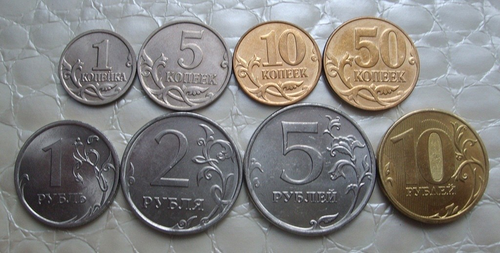

Blurred


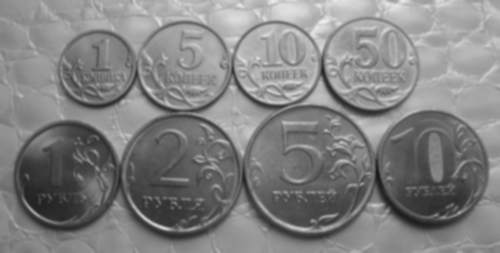

In [4]:
# загружаем изображение, конвертируем его 
# в градации серого и слегка размываем
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# покажем исходное и размытое изображения
# show the original and blurred images
print("Original") 
cv2_imshow(image)

print("Blurred") 
cv2_imshow(blurred)

Wide Edge Map


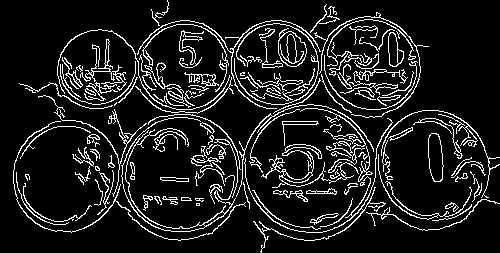

Mid Edge Map


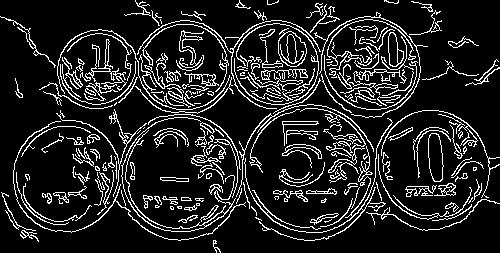

Tight Edge Map


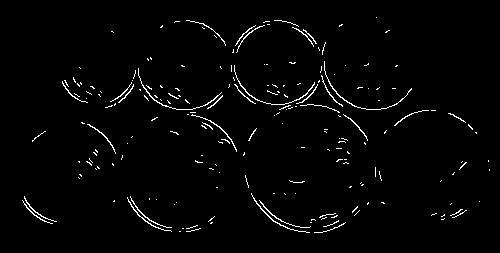

In [9]:
# вычислим "широкий", "средний" и "узкий" порог для краев
# compute a "wide", "mid-range", and "tight" threshold for the edges
wide = cv2.Canny(blurred, 10, 210)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

# отобразим карты границ
# show the edge maps
print("Wide Edge Map") 
cv2_imshow(wide)
print("Mid Edge Map") 
cv2_imshow(mid)
print("Tight Edge Map") 
cv2_imshow(tight)
